# 1. Menganalisis kolom "Primary Platform" untuk melihat platform mana yang lebih banyak digunakan oleh pengguna berdasarkan kategori usia, negara dan jenis kelamin

# 2.  Menganalisis "Social Media Platforms Used" untuk melihat platform mana yang lebih sering digunakan berdasarkan kategori usia, negara dan jenis kelamin


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [2]:
!pip install ace_tools

In [3]:
!pip install --upgrade scikit-learn

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science - Google Collaboratory/DS Dibimbing/Latihan Coding/Final Project/social_media_entertainment_data.csv')
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,1,32,Other,Germany,4.35,4.08,5,TikTok,0.35,5.43,...,20,4.11,Yes,9,Tablet,50GB,Moderate,7,8,33.04
1,2,62,Other,India,4.96,4.21,2,YouTube,2.55,4.22,...,26,4.59,Yes,9,PC,10GB,Low,8,2,497.78
2,3,51,Female,USA,6.78,1.77,4,Facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,Female,India,5.06,9.21,3,YouTube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
4,5,21,Other,Germany,2.57,1.30,4,TikTok,3.97,2.74,...,42,4.14,Yes,7,Smart TV,Unlimited,Low,5,9,35.90


In [5]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   User ID                                     300000 non-null  int64  
 1   Age                                         300000 non-null  int64  
 2   Gender                                      300000 non-null  object 
 3   Country                                     300000 non-null  object 
 4   Daily Social Media Time (hrs)               300000 non-null  float64
 5   Daily Entertainment Time (hrs)              300000 non-null  float64
 6   Social Media Platforms Used                 300000 non-null  int64  
 7   Primary Platform                            300000 non-null  object 
 8   Daily Messaging Time (hrs)                  300000 non-null  float64
 9   Daily Video Content Time (hrs)              300000 non-null  float64
 

(None,
              User ID            Age  Daily Social Media Time (hrs)  \
 count  300000.000000  300000.000000                  300000.000000   
 mean   150000.500000      38.530547                       4.254808   
 std     86602.684716      15.005038                       2.165604   
 min         1.000000      13.000000                       0.500000   
 25%     75000.750000      26.000000                       2.380000   
 50%    150000.500000      39.000000                       4.260000   
 75%    225000.250000      52.000000                       6.130000   
 max    300000.000000      65.000000                       8.000000   
 
        Daily Entertainment Time (hrs)  Social Media Platforms Used  \
 count                   300000.000000                300000.000000   
 mean                         5.244080                     3.000143   
 std                          2.741804                     1.413682   
 min                          0.500000                     1.000000 

# 1. Data Pre-prosessing (Data Cleaning)

In [6]:
# Cek missing values
print("Missing values:\n", df.isnull().sum())

# Cek duplikat
print("Jumlah duplikat:", df.duplicated().sum())

# Hapus duplikat
df = df.drop_duplicates()

# Tangani missing values (contoh: isi missing dengan 'Unknown' atau rata-rata)
df['Primary Platform'].fillna('Unknown', inplace=True)
df['Social Media Platforms Used'].fillna('None', inplace=True)

Missing values:
 User ID                                       0
Age                                           0
Gender                                        0
Country                                       0
Daily Social Media Time (hrs)                 0
Daily Entertainment Time (hrs)                0
Social Media Platforms Used                   0
Primary Platform                              0
Daily Messaging Time (hrs)                    0
Daily Video Content Time (hrs)                0
Daily Gaming Time (hrs)                       0
Occupation                                    0
Marital Status                                0
Monthly Income (USD)                          0
Device Type                                   0
Internet Speed (Mbps)                         0
Subscription Platforms                        0
Average Sleep Time (hrs)                      0
Physical Activity Time (hrs)                  0
Reading Time (hrs)                            0
Work/Study Time (hrs)  

<ipython-input-6-4d7e7208ef52>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Primary Platform'].fillna('Unknown', inplace=True)
<ipython-input-6-4d7e7208ef52>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

#2. Data Pre-prosessing (Data Manipulation)

In [7]:
#Periksa tipe data
print("Tipe data:\n", df.dtypes)

Tipe data:
 User ID                                         int64
Age                                             int64
Gender                                         object
Country                                        object
Daily Social Media Time (hrs)                 float64
Daily Entertainment Time (hrs)                float64
Social Media Platforms Used                     int64
Primary Platform                               object
Daily Messaging Time (hrs)                    float64
Daily Video Content Time (hrs)                float64
Daily Gaming Time (hrs)                       float64
Occupation                                     object
Marital Status                                 object
Monthly Income (USD)                          float64
Device Type                                    object
Internet Speed (Mbps)                         float64
Subscription Platforms                          int64
Average Sleep Time (hrs)                      float64
Physical Activit

In [8]:
# 1. Memeriksa nilai yang hilang pada kolom yang relevan
missing_values = df[['Primary Platform', 'Social Media Platforms Used', 'Age', 'Gender', 'Country']].isnull().sum()

# 2. Pembersihan data, mengubah nilai kategori menjadi lowercase untuk konsistensi
df['Primary Platform'] = df['Primary Platform'].str.lower().str.strip()
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Country'] = df['Country'].str.lower().str.strip()

# Memeriksa kembali missing values setelah pembersihan
missing_values_cleaned = df[['Primary Platform', 'Social Media Platforms Used', 'Age', 'Gender', 'Country']].isnull().sum()

In [9]:
# Hapus baris dengan nilai 'other' di kolom Gender
df = df[df['Gender'] != 'other']

# Hitung jumlah baris untuk 'male' dan 'female'
male_count = df[df['Gender'] == 'male'].shape[0]
female_count = df[df['Gender'] == 'female'].shape[0]

# Tentukan jumlah minimum antara 'male' dan 'female'
min_count = min(male_count, female_count)

# Ambil sampel secara acak dari 'male' dan 'female' agar jumlahnya sama
df_male = df[df['Gender'] == 'male'].sample(n=min_count, random_state=42)
df_female = df[df['Gender'] == 'female'].sample(n=min_count, random_state=42)

# Gabungkan kembali data yang sudah diseimbangkan
df_balanced = pd.concat([df_male, df_female])

# Acak urutan baris agar data tidak terurut berdasarkan gender
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
Gender_Counts = df['Gender'].value_counts()
print(Gender_Counts)

Gender
male      99902
female    99873
Name: count, dtype: int64


In [11]:
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
2,3,51,female,usa,6.78,1.77,4,facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,female,india,5.06,9.21,3,youtube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
5,6,21,male,canada,4.69,1.70,3,facebook,2.60,4.92,...,20,3.29,Yes,9,PC,Unlimited,High,6,1,49.41
6,7,16,male,germany,3.59,5.89,5,tiktok,2.44,2.76,...,46,0.22,No,8,Tablet,50GB,Low,2,2,95.29
7,8,58,female,usa,4.20,2.77,4,facebook,3.54,0.69,...,27,0.03,No,2,Tablet,Unlimited,Low,9,1,9.65


In [12]:
# Define age ranges for categorization
age_bins = [13, 18, 25, 35, 45, 55, 65, 100]  # Define age range bins
age_labels = ['13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Age range labels

# Add a new column to categorize users by age range
df['Age Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Menampilkan DataFrame setelah menambahkan kolom Age Range
print(df)

        User ID  Age  Gender  Country  Daily Social Media Time (hrs)  \
2             3   51  female      usa                           6.78   
3             4   44  female    india                           5.06   
5             6   21    male   canada                           4.69   
6             7   16    male  germany                           3.59   
7             8   58  female      usa                           4.20   
...         ...  ...     ...      ...                            ...   
299993   299994   41  female  germany                           3.40   
299995   299996   17  female   canada                           1.98   
299996   299997   45  female  germany                           3.78   
299997   299998   45    male   canada                           6.25   
299998   299999   15    male      usa                           6.47   

        Daily Entertainment Time (hrs)  Social Media Platforms Used  \
2                                 1.77                          

In [13]:
df.head(20)

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD),Age Range
2,3,51,female,usa,6.78,1.77,4,facebook,2.09,1.09,...,0.66,Yes,9,Tablet,10GB,High,5,3,71.72,46-55
3,4,44,female,india,5.06,9.21,3,youtube,3.69,4.80,...,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62,36-45
5,6,21,male,canada,4.69,1.70,3,facebook,2.60,4.92,...,3.29,Yes,9,PC,Unlimited,High,6,1,49.41,19-25
6,7,16,male,germany,3.59,5.89,5,tiktok,2.44,2.76,...,0.22,No,8,Tablet,50GB,Low,2,2,95.29,13-18
7,8,58,female,usa,4.20,2.77,4,facebook,3.54,0.69,...,0.03,No,2,Tablet,Unlimited,Low,9,1,9.65,56-65
10,11,14,male,uk,2.58,8.08,5,instagram,4.79,3.56,...,2.74,No,2,PC,Unlimited,Moderate,1,9,253.37,13-18
12,13,56,male,uk,0.51,9.35,4,facebook,2.04,4.09,...,1.52,Yes,8,Smart TV,Unlimited,Moderate,4,1,62.41,56-65
13,14,24,male,germany,6.00,0.66,4,twitter,1.92,3.57,...,3.88,No,1,Smart TV,50GB,Low,2,2,389.03,19-25
14,15,22,female,canada,3.73,2.71,1,instagram,0.32,4.01,...,4.08,Yes,1,PC,50GB,Low,9,9,166.10,19-25
15,16,22,female,germany,3.10,6.19,5,twitter,4.90,4.98,...,1.53,Yes,2,Smartphone,10GB,Moderate,4,7,290.59,19-25


In [14]:
# Define features and target variable
X = df.drop(columns=['Ad Interaction Count'])
y = df['Ad Interaction Count']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Exploratory Data Analysis (EDA)

In [16]:
# Analyzing the 'Primary Platform' based on Age, Gender, and Country
primary_platform_analysis = df.groupby(['Age', 'Gender', 'Country', 'Primary Platform']).size().reset_index(name='Count')

In [17]:
# Analyzing the 'Social Media Platforms Used' based on Age, Gender, and Country
social_media_platforms_analysis = df.groupby(['Age', 'Gender', 'Country', 'Social Media Platforms Used']).size().reset_index(name='Count')

In [18]:
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD),Age Range
2,3,51,female,usa,6.78,1.77,4,facebook,2.09,1.09,...,0.66,Yes,9,Tablet,10GB,High,5,3,71.72,46-55
3,4,44,female,india,5.06,9.21,3,youtube,3.69,4.80,...,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62,36-45
5,6,21,male,canada,4.69,1.70,3,facebook,2.60,4.92,...,3.29,Yes,9,PC,Unlimited,High,6,1,49.41,19-25
6,7,16,male,germany,3.59,5.89,5,tiktok,2.44,2.76,...,0.22,No,8,Tablet,50GB,Low,2,2,95.29,13-18
7,8,58,female,usa,4.20,2.77,4,facebook,3.54,0.69,...,0.03,No,2,Tablet,Unlimited,Low,9,1,9.65,56-65


Analisis EDA (Exploratory Data Analysis) yang dilakukan dengan mengelompokkan data berdasarkan 'Age', 'Gender', 'Country' dengan mengidentidikasi 'Primary Platform' dan 'Social Media Platforms Used' sudah cukup untuk beberapa alasan berikut:

1. Pemahaman Dasar: Analisis ini memberikan pemahaman dasar tentang bagaimana platform utama dan intensitas penggunaannya oleh berbagai kelompok usia, gender, dan negara. Ini adalah langkah awal yang penting untuk memahami distribusi dan pola data.

2. Segmentasi Pengguna: Dengan mengelompokkan data berdasarkan usia, gender, dan negara, Kita dapat mengidentifikasi segmen pengguna yang berbeda dan preferensi platform mereka. Ini sangat berguna untuk strategi pemasaran yang lebih terarah.

3. Identifikasi Pola: Analisis ini membantu mengidentifikasi pola atau tren tertentu dalam penggunaan platform. Misalnya, apakah ada platform yang lebih populer di kalangan usia tertentu atau gender tertentu di negara tertentu.

In [19]:
# Simpan DataFrame ke file CSV
df.to_csv('Social Media Download.csv', index=False)

# Download file CSV
files.download('Social Media Download.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Visualisasi

## Visualisasi Primary Platform

<ipython-input-20-12a658ebd464>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  primary_platform_by_age = df.groupby(['Age Range', 'Primary Platform']).size().unstack(fill_value=0)


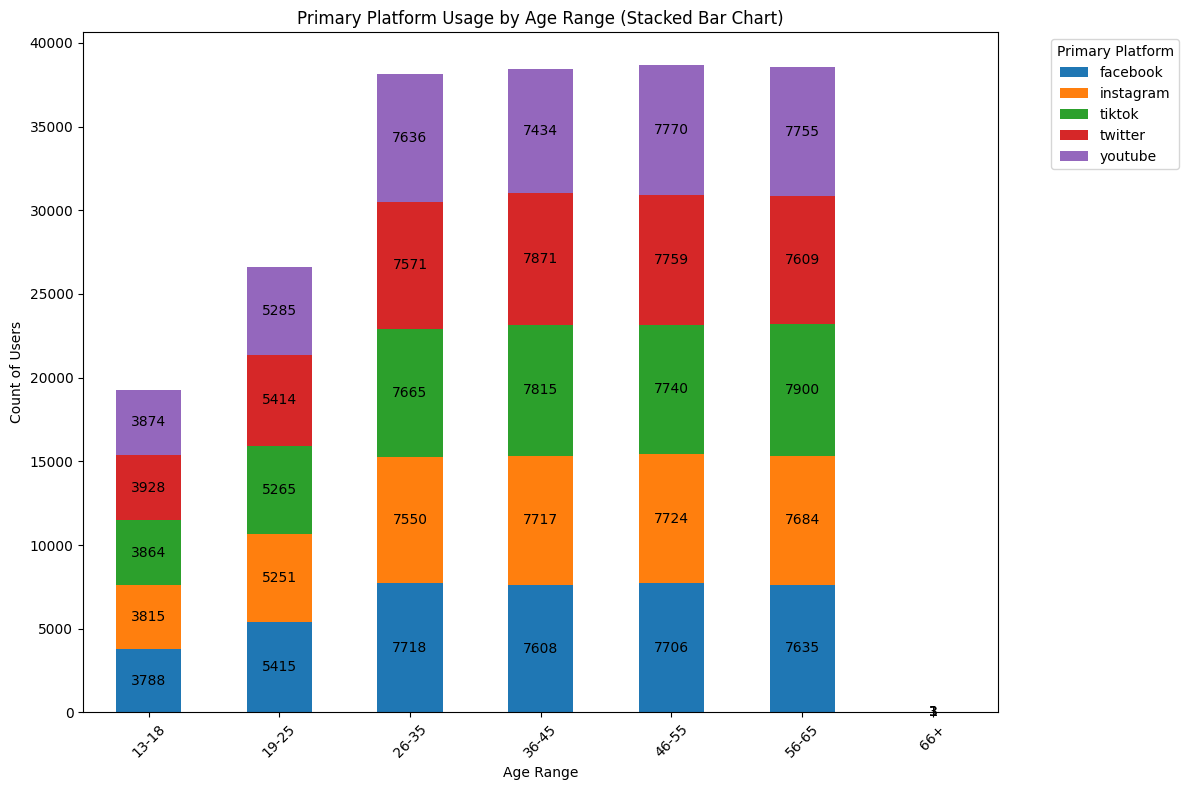

In [20]:
# Define age ranges for categorization
age_bins = [13, 18, 25, 35, 45, 55, 65, 100]  # Define age range bins
age_labels = ['13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']  # Age range labels

# Add a new column to categorize users by age range
df['Age Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Analyzing the 'Primary Platform' by Age Range
primary_platform_by_age = df.groupby(['Age Range', 'Primary Platform']).size().unstack(fill_value=0)

# Stacked Bar Chart for Primary Platform Usage by Age Range
ax = primary_platform_by_age.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Primary Platform Usage by Age Range (Stacked Bar Chart)')
plt.xlabel('Age Range')
plt.ylabel('Count of Users')
plt.xticks(rotation=45)
plt.legend(title='Primary Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add text (numbers) on each part of the stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if the height is greater than 0
        ax.text(x + width/2, y + height/2, f'{int(height)}', ha='center', va='center')

plt.tight_layout()
plt.show()

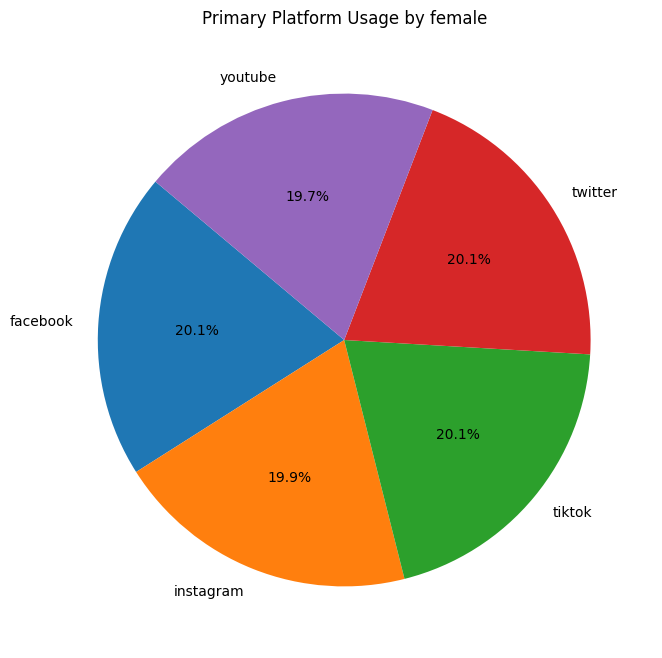

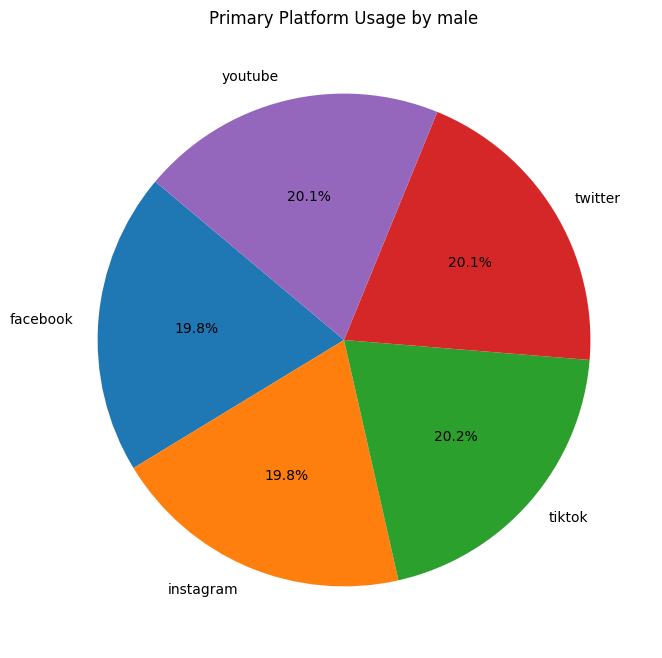

In [21]:
# Analyzing the 'Primary Platform' by Gender
primary_platform_by_gender = df.groupby(['Gender', 'Primary Platform']).size().unstack(fill_value=0)

# Plot Pie Charts for Primary Platform Usage by Gender
genders = primary_platform_by_gender.index
for gender in genders:
    plt.figure(figsize=(8, 8))
    plt.pie(primary_platform_by_gender.loc[gender], labels=primary_platform_by_gender.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Primary Platform Usage by {gender}')
    plt.show()

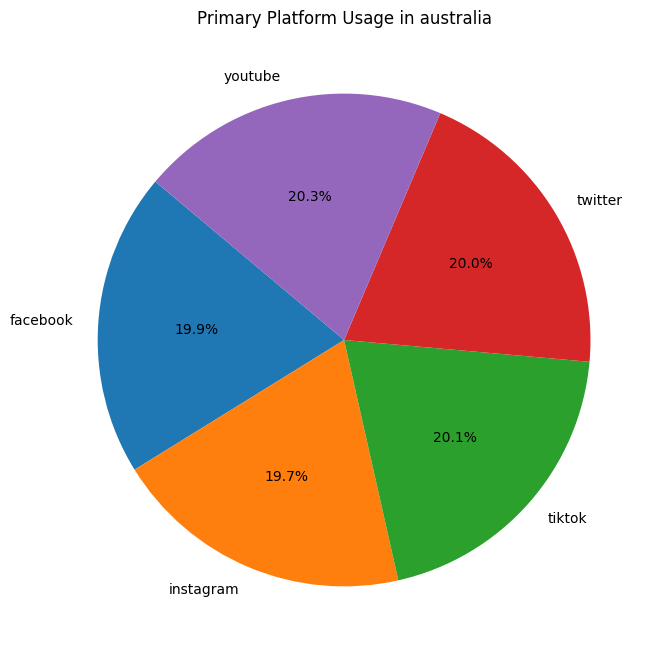

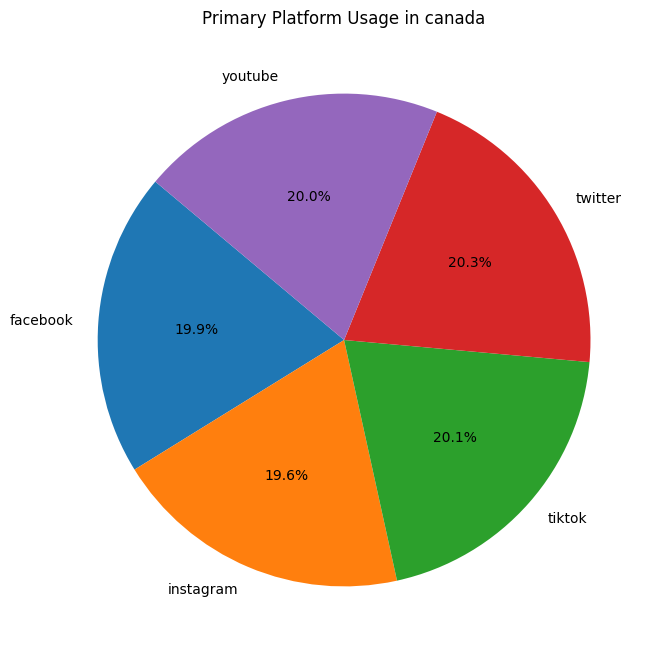

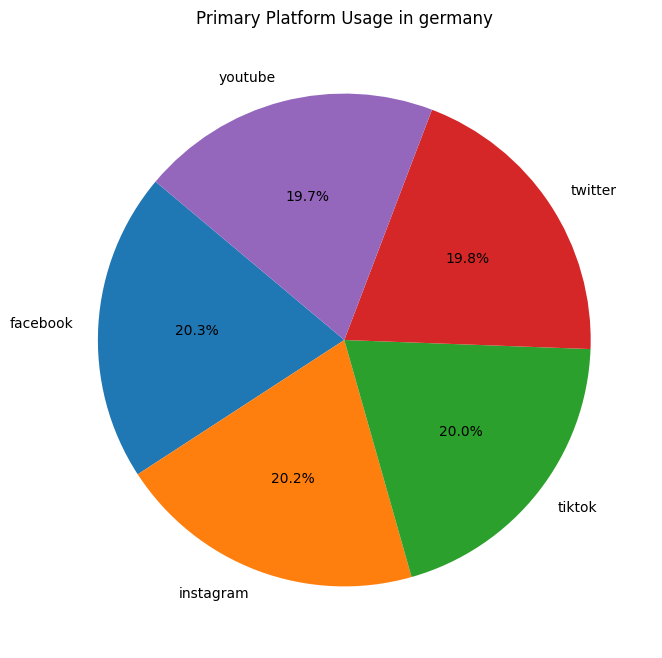

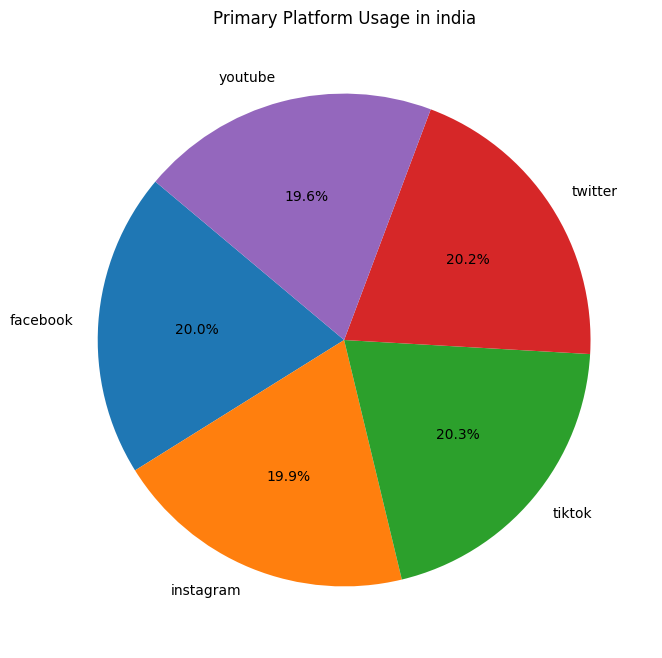

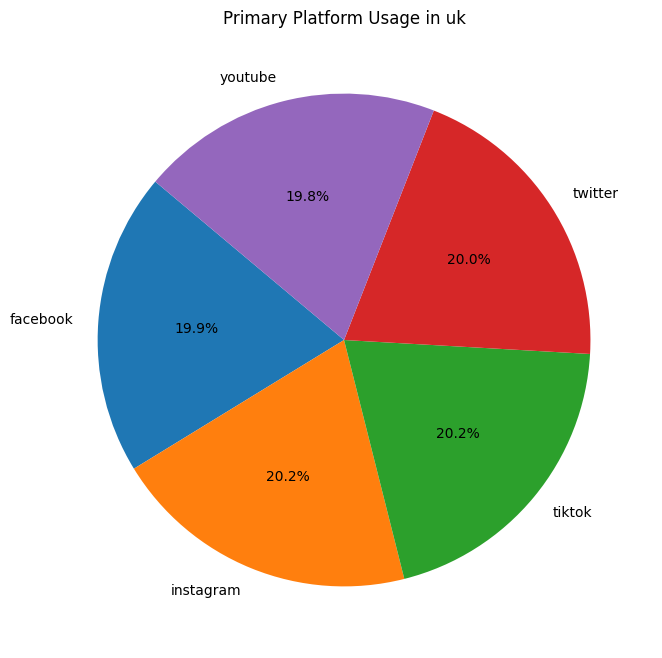

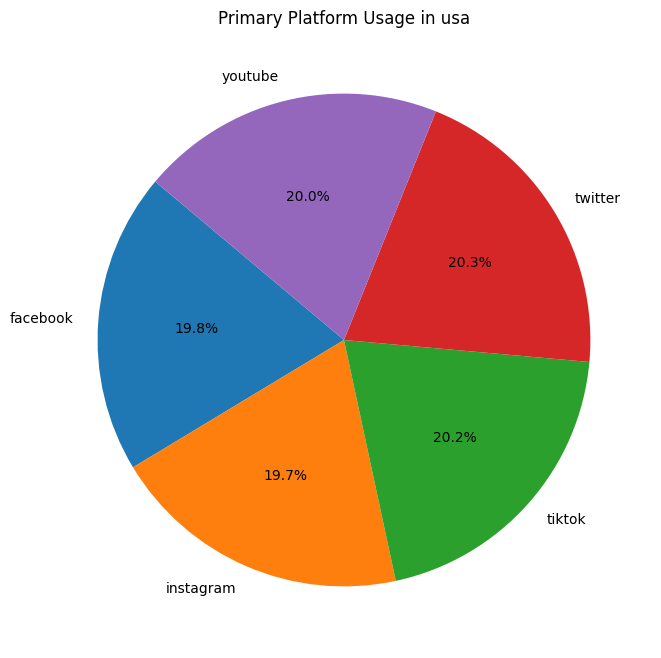

In [22]:
# Analyzing the 'Primary Platform' by Country
primary_platform_by_country = df.groupby(['Country', 'Primary Platform']).size().unstack(fill_value=0)

# Plot Pie Charts for Primary Platform Usage by Country
countries = primary_platform_by_country.index
for country in countries:
    plt.figure(figsize=(8, 8))
    plt.pie(primary_platform_by_country.loc[country], labels=primary_platform_by_country.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Primary Platform Usage in {country}')
    plt.show()

# Visualisasi Social Media Platforms Used

$ Social Media Platforms Used pada dataset mengindikasikan jumlah platform media sosial yang digunakan oleh masing-masing pengguna. Nilai dalam kolom ini menunjukkan seberapa banyak platform sosial yang digunakan oleh individu dalam kehidupan sehari-hari mereka, yang mungkin mencakup berbagai aplikasi seperti Facebook, Instagram, TikTok, Twitter, YouTube, dan lainnya.

Misalnya:

- Jika nilai kolomnya adalah 5, maka pengguna tersebut menggunakan lima platform media sosial.
- Jika nilai kolomnya adalah 2, berarti pengguna hanya menggunakan dua platform sosial media.

<ipython-input-23-458bf388982a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  social_media_simplified_age = df.groupby(['Age Range', 'Social Media Platforms Used']).size().reset_index(name='Count')
<ipython-input-23-458bf388982a>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = social_media_simplified_age.pivot_table(


<Figure size 1200x800 with 0 Axes>

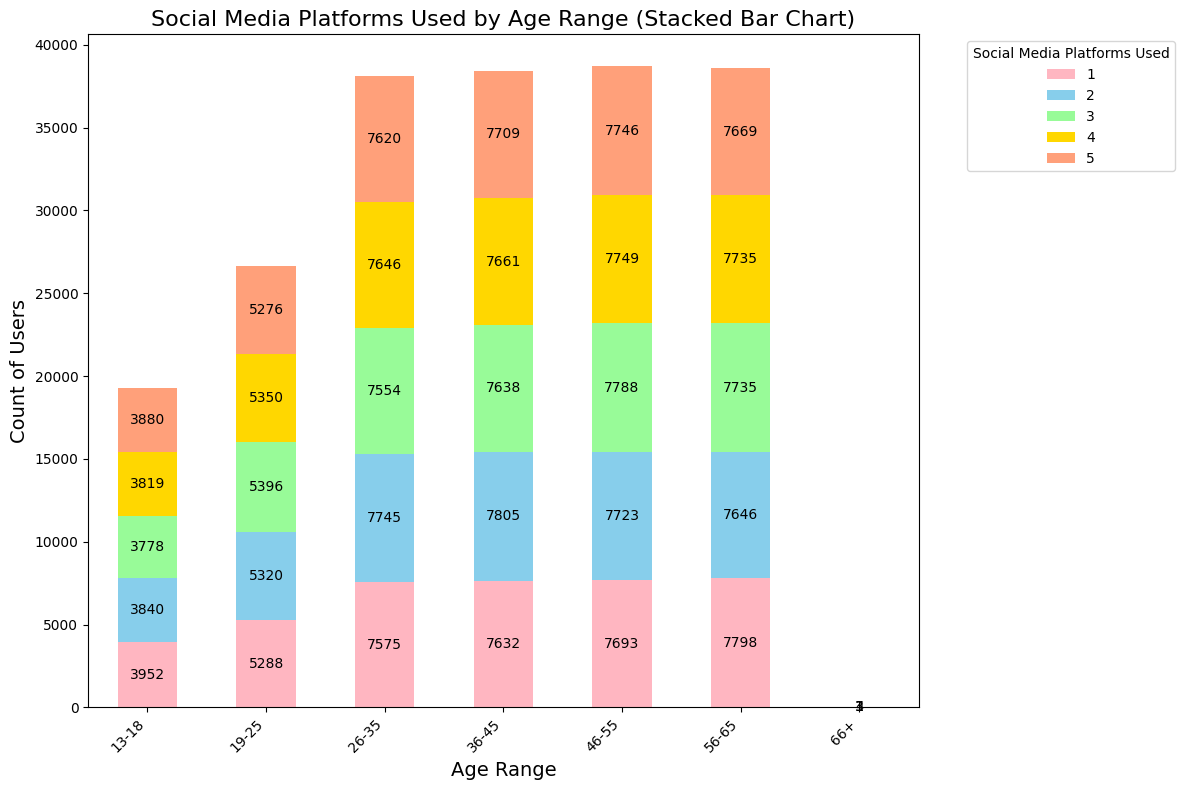

In [23]:
# Simplified visualization for Social Media Platforms Used by Age Range
social_media_simplified_age = df.groupby(['Age Range', 'Social Media Platforms Used']).size().reset_index(name='Count')

# Pivot the data for stacked bar chart
pivot_table = social_media_simplified_age.pivot_table(
    index='Age Range',
    columns='Social Media Platforms Used',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

# Define a lighter color palette
colors = ['#FFB6C1', '#87CEEB', '#98FB98', '#FFD700', '#FFA07A', '#DDA0DD', '#00CED1']

# Plot stacked bar chart with custom colors
plt.figure(figsize=(12, 8))
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Add annotations (numbers) on each stack
for i, (age_range, row) in enumerate(pivot_table.iterrows()):
    bottom = 0  # Initialize the bottom position for stacking
    for platform, value in row.items():
        if value > 0:  # Only annotate if the value is greater than 0
            ax.text(
                i,  # x-position (age range index)
                bottom + value / 2,  # y-position (middle of the stack)
                f'{int(value)}',  # Text to display (count value)
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='black',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom position for the next stack

# Customize the plot
plt.title('Social Media Platforms Used by Age Range (Stacked Bar Chart)', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Count of Users', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Social Media Platforms Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

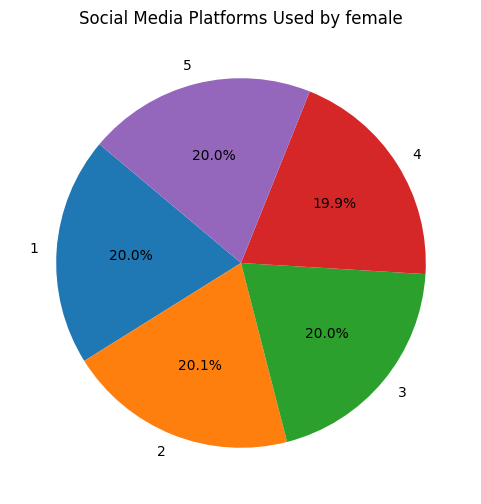

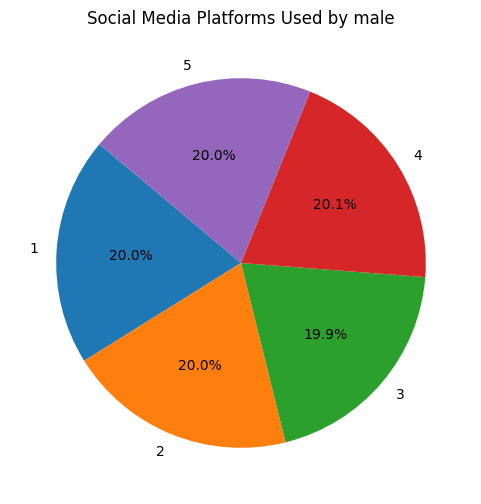

In [24]:
# Simplified visualization for Social Media Platforms Used by Gender
social_media_simplified_gender = df.groupby(['Gender', 'Social Media Platforms Used']).size().reset_index(name='Count')

# Pivot the data to get the count of each social media platform used by gender
pivot_table = social_media_simplified_gender.pivot_table(index='Gender', columns='Social Media Platforms Used', values='Count', aggfunc='sum', fill_value=0)

# Plot pie charts for each gender
genders = pivot_table.index
for gender in genders:
    plt.figure(figsize=(6, 6))
    plt.pie(pivot_table.loc[gender], labels=pivot_table.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Social Media Platforms Used by {gender}')
    plt.show()

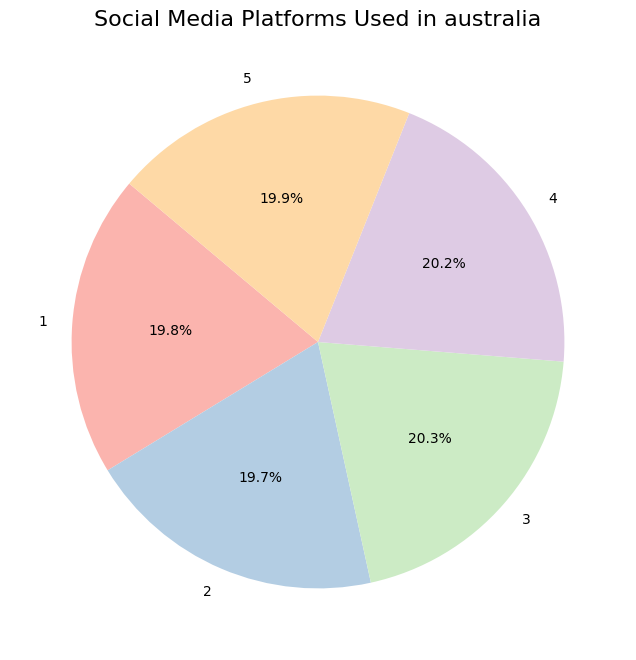

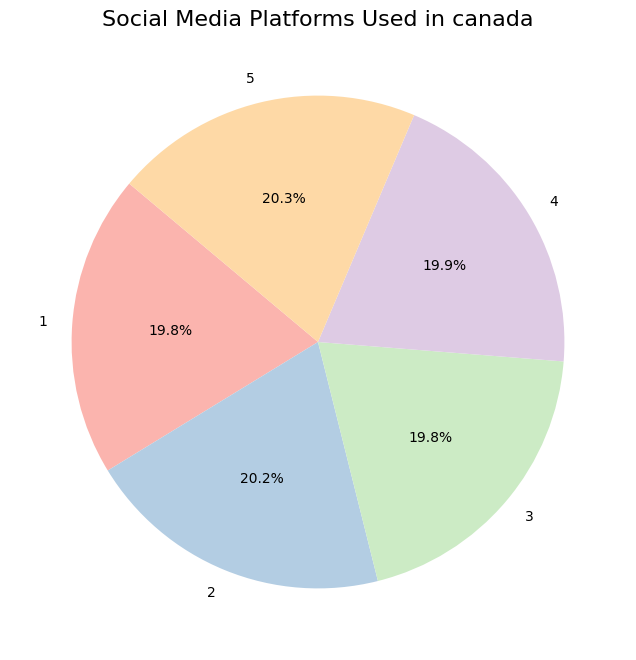

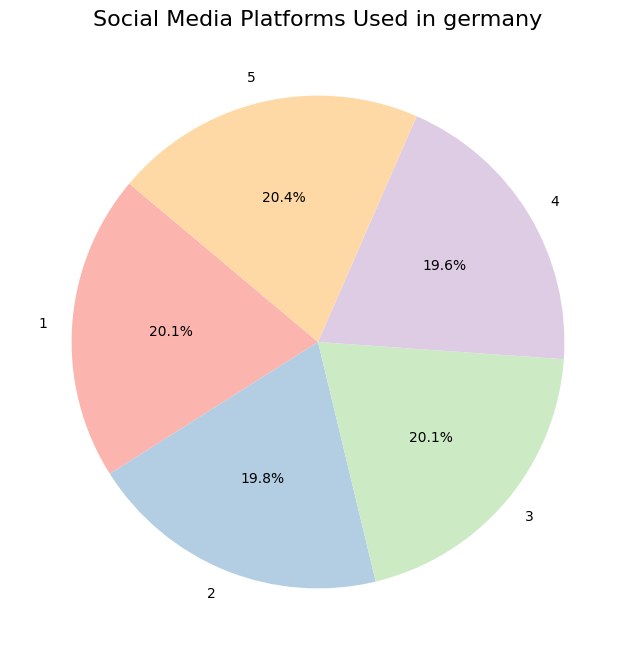

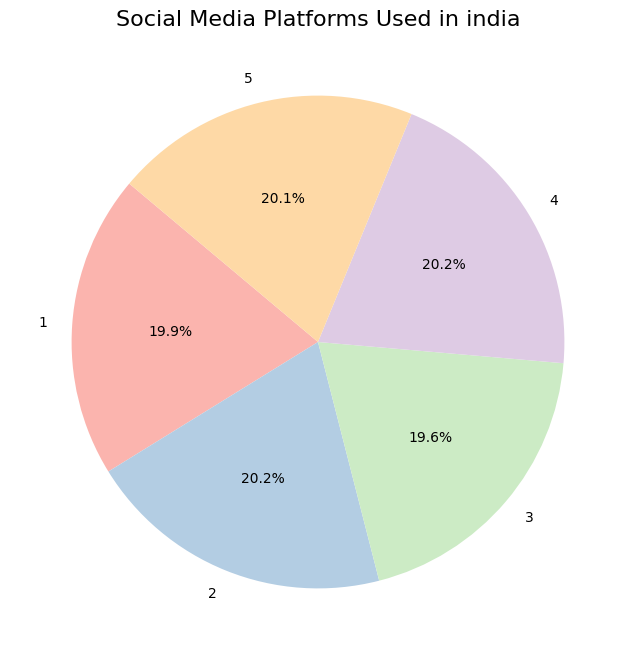

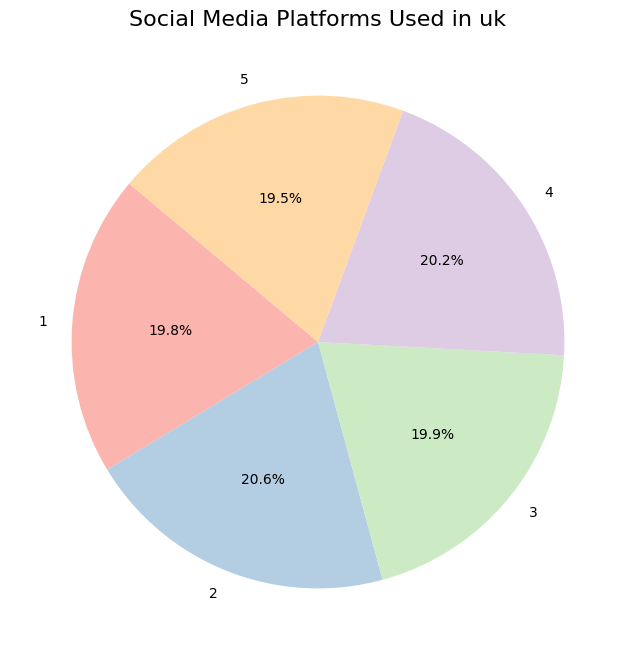

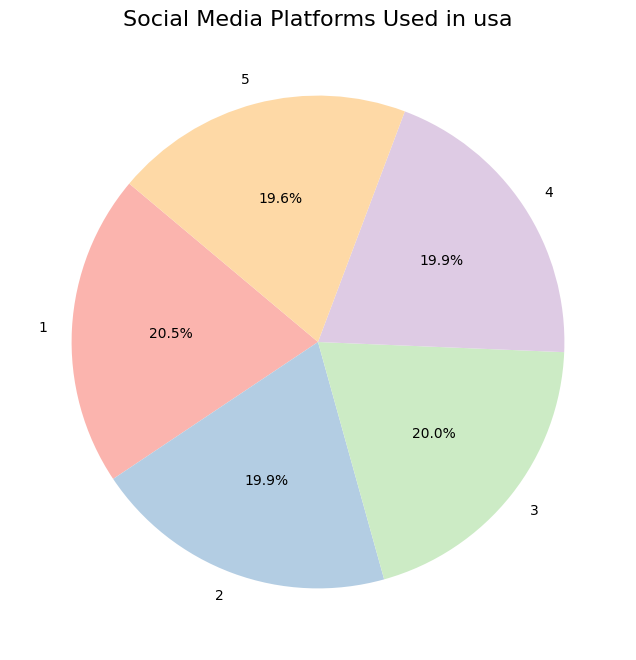

In [25]:
# Group data by Country and Social Media Platforms Used
social_media_simplified_country = df.groupby(['Country', 'Social Media Platforms Used']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_table = social_media_simplified_country.pivot_table(
    index='Country',
    columns='Social Media Platforms Used',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

# Plot a pie chart for each country
for country in pivot_table.index:
    plt.figure(figsize=(8, 8))
    plt.pie(
        pivot_table.loc[country],  # Data for the current country
        labels=pivot_table.columns,  # Labels for platforms
        autopct='%1.1f%%',  # Display percentages
        startangle=140,  # Rotate the pie chart for better readability
        colors=plt.cm.Pastel1.colors  # Use a light color scheme
    )
    plt.title(f'Social Media Platforms Used in {country}', fontsize=16)
    plt.show()

# Feature Engineering

In [26]:
# Feature selection
features = ['Daily Social Media Time (hrs)', 'Daily Entertainment Time (hrs)',
            'Social Media Platforms Used', 'Primary Platform', 'Age', 'Gender',
            'Country']
X = df[features]
y = df['Ad Interaction Count']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['Primary Platform', 'Gender', 'Country'], drop_first=True)

In [27]:
# Ubah 'male' menjadi 1 dan 'female' menjadi 2
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

In [28]:
# Ubah 'Country'
df['Country'] = df['Country'].map({'australia': 1, 'canada': 2, 'germany': 3, 'india': 4, 'uk': 5, 'usa': 6})

- australia terisi dengan angka 1
- canada terisi dengan angka 2
- germany terisi dengan angka 3
- india terisi dengan angka 4
- uk terisi dengan angka 5
- usa terisi dengan angka 6

In [29]:
# Assuming X_train and X_test are pandas DataFrames
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

In [30]:
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD),Age Range
2,3,51,1,6,6.78,1.77,4,facebook,2.09,1.09,...,0.66,Yes,9,Tablet,10GB,High,5,3,71.72,46-55
3,4,44,1,4,5.06,9.21,3,youtube,3.69,4.80,...,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62,36-45
5,6,21,0,2,4.69,1.70,3,facebook,2.60,4.92,...,3.29,Yes,9,PC,Unlimited,High,6,1,49.41,19-25
6,7,16,0,3,3.59,5.89,5,tiktok,2.44,2.76,...,0.22,No,8,Tablet,50GB,Low,2,2,95.29,13-18
7,8,58,1,6,4.20,2.77,4,facebook,3.54,0.69,...,0.03,No,2,Tablet,Unlimited,Low,9,1,9.65,56-65


# Modelling

In [31]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ValueError: could not convert string to float: '19-25'

In [ ]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

In [ ]:
# Prediksi menggunakan Linear Regression
y_pred_linear = linear_model.predict(X_test)  # X_test adalah data input untuk prediksi

In [ ]:
# Prediksi menggunakan Gradient Boosting Regressor
y_pred_gb = gb_model.predict(X_test)  # X_test adalah data input untuk prediksi

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Linear Regression:")
print(y_pred_linear)

In [ ]:
print("\nPrediksi Gradient Boosting Regressor:")
print(y_pred_gb)

# Hyperparameter Tuning

In [ ]:
# Definisikan model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Definisikan parameter grid untuk tuning
param_grid = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}

In [ ]:
# Lakukan Grid Search dengan cross-validation (cv=3)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

In [ ]:
# Fit model pada data training
grid_search.fit(X_train, y_train)

In [ ]:
# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Gunakan model terbaik untuk prediksi
best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluasi

In [ ]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)  # Menghitung Mean Absolute Error (MAE)
    mse = mean_squared_error(y_true, y_pred)  # Menghitung Mean Squared Error (MSE)
    r2 = r2_score(y_true, y_pred)  # Menghitung R-squared
    print(f'{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}')

In [ ]:
# Evaluasi Linear Regression
evaluate_model(y_test, y_pred_linear, 'Linear Regression')

In [ ]:
# Evaluasi Gradient Boosting Regressor
evaluate_model(y_test, y_pred_gb, 'Gradient Boosting Regressor')